In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
for i in df.select_dtypes([float, int]).columns:
    if i == "DiabetesPedigreeFunction" and i == "Insulin" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(2.5*IQR)
        ust_sinir = Q3+(2.5*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
        
    elif  i == "BloodPressure" and i == "BMI" and i == "Age" :
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3-Q1
            alt_sinir = Q1-(1.8*IQR)
            ust_sinir = Q3+(1.8*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
            aykiri_alt = df[i] < alt_sinir
            aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
            df[i][aykiri_alt] = alt_sinir
            df[i][aykiri_ust] = ust_sinir
    
    else : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.7*IQR)
        ust_sinir = Q3+(1.7*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir

In [4]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [19]:
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("svc", SVC(random_state = 42, probability=True))]
Pipeline(steps=operations)
svc_model = Pipeline(steps=operations)
svc_model.fit(X_train, y_train)
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[84 16]
 [21 33]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Train_Set
[[372  28]
 [ 70 144]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       400
           1       0.84      0.67      0.75       214

    accuracy                           0.84       614
   macro avg       0.84      0.80      0.81       614
weighted avg       0.84      0.84      0.84       614



In [20]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

precision_1 = make_scorer(precision_score, pos_label = 1)
recall_1 = make_scorer(recall_score, pos_label = 1)
f1_1 = make_scorer(f1_score, pos_label = 1)
accuracy_1 = make_scorer(accuracy_score, pos_label=1)

operations = [("scaler", StandardScaler()), ("svc", SVC(random_state = 42, probability=True))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = {"precision_1":precision_1, "recall_1":recall_1, 
                                                            "f1_1":f1_1}, cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_1   0.716
test_recall_1      0.598
test_f1_1          0.646
dtype: float64

In [22]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("svc", SVC(random_state=42, probability=True))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

param_grid = {'svc__C': np.arange(0,10),
              'svc__gamma': ["scale", "auto", 0.2, 0.3],
              'svc__kernel': ['rbf', 'linear', "sigmoid", "poly"],
             "svc__degree": [2,3,4,5]}

grid_model = GridSearchCV(model, param_grid, scoring= recall_1 , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid={'svc__C': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'svc__degree': [2, 3, 4, 5],
                         'svc__gamma': ['scale', 'auto', 0.2, 0.3],
                         'svc__kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             scoring=make_scorer(recall_score, pos_label=1))

In [23]:
grid_model.best_params_

{'svc__C': 7, 'svc__degree': 2, 'svc__gamma': 0.2, 'svc__kernel': 'rbf'}

In [24]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[79 21]
 [22 32]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       100
           1       0.60      0.59      0.60        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154


Train_Set
[[389  11]
 [ 33 181]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       400
           1       0.94      0.85      0.89       214

    accuracy                           0.93       614
   macro avg       0.93      0.91      0.92       614
weighted avg       0.93      0.93      0.93       614



In [25]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

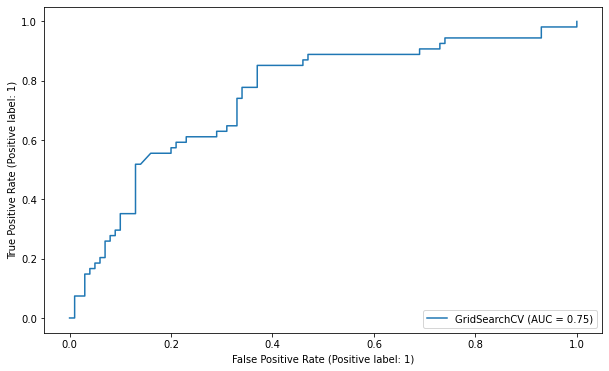

In [26]:
plot_roc_curve(grid_model, X_test, y_test, pos_label=1);

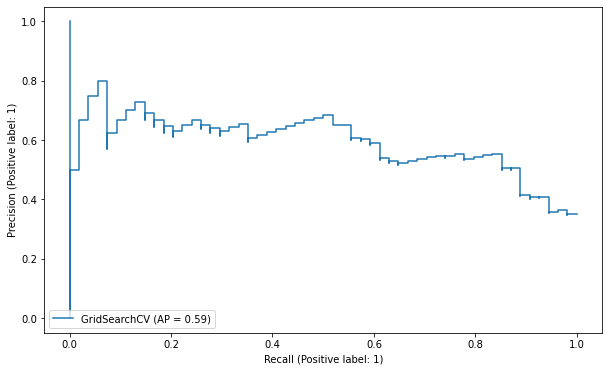

In [27]:
plot_precision_recall_curve(grid_model, X_test, y_test, pos_label=1);

In [28]:
y_pred_proba_tr = svc_model.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba_tr[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba_tr[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate) 

optimal_threshold = thresholds[optimal_idx] # en iyi threshold değerimizin olduğu indexi arraye vererek buluruz.
optimal_threshold

0.2327312129385012

In [29]:
y_pred = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49 51]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.89      0.49      0.63       100
           1       0.48      0.89      0.63        54

    accuracy                           0.63       154
   macro avg       0.69      0.69      0.63       154
weighted avg       0.75      0.63      0.63       154



In [30]:
y_pred1 = pd.Series(grid_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_train, y_pred1))
print(classification_report(y_train, y_pred1))

[[215 185]
 [  4 210]]
              precision    recall  f1-score   support

           0       0.98      0.54      0.69       400
           1       0.53      0.98      0.69       214

    accuracy                           0.69       614
   macro avg       0.76      0.76      0.69       614
weighted avg       0.82      0.69      0.69       614



In [31]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    # for ile manuel olarak cross validation train ve test verilerini seçiyoruz.
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    # aldığımız her skoru yukarıda tanımlanan boş listeye atıyoruz. 
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%') 
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [33]:
grid_model.best_params_

{'svc__C': 7, 'svc__degree': 2, 'svc__gamma': 0.2, 'svc__kernel': 'rbf'}

In [34]:
operations = [("scaler", StandardScaler()), ("svc", SVC(random_state=42, probability=True, C=7.0, degree=2, gamma=0.2,
                                                       kernel="rbf"))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)
model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=7.0, degree=2, gamma=0.2, probability=True,
                     random_state=42))])

In [35]:
prediction = pd.Series(model.predict_proba(X)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y, prediction))
print(classification_report(y, prediction))

[[250 250]
 [  5 263]]
              precision    recall  f1-score   support

           0       0.98      0.50      0.66       500
           1       0.51      0.98      0.67       268

    accuracy                           0.67       768
   macro avg       0.75      0.74      0.67       768
weighted avg       0.82      0.67      0.67       768



In [37]:
CV(10, model, X, y, optimal_threshold)

Accuracy      65.35%  std 4.56%
Precision-1   50.59%  std 4.41%
Recall-1      84.69%  std 6.15%
F1_score-1    63.12%  std 3.50%


In [38]:
scale = StandardScaler()
X_scale = scale.fit_transform(X)

In [40]:
CV(10, model, pd.DataFrame(X_scale), y, optimal_threshold)

Accuracy      65.35%  std 4.56%
Precision-1   50.59%  std 4.41%
Recall-1      84.69%  std 6.15%
F1_score-1    63.12%  std 3.50%
